       Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000  


C:\Users\Udhaya kiran\AppData\Local\Temp\ipykernel_18172\3957207792.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill",inplace=True)


Region                                     0
Date                                       0
Frequency                                  0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

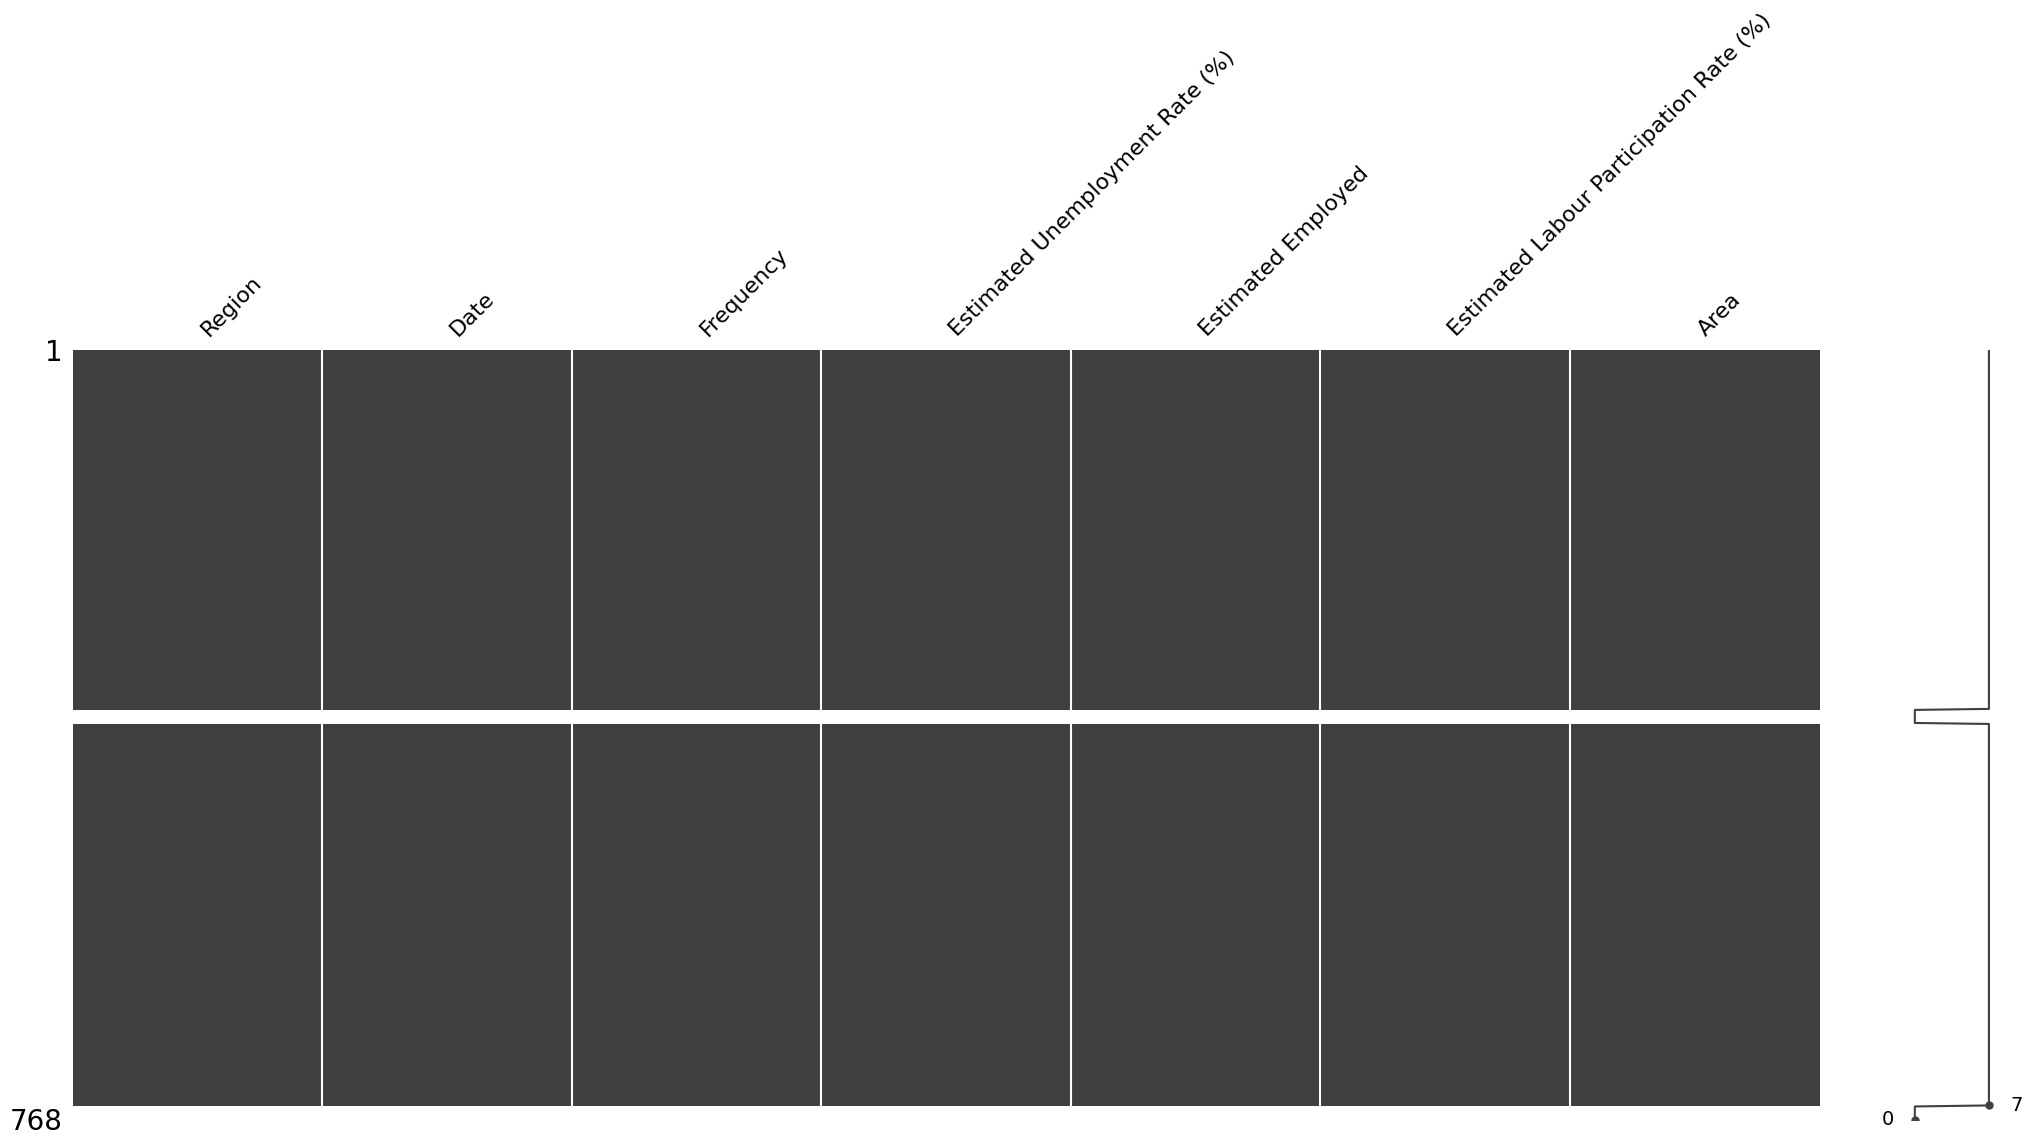

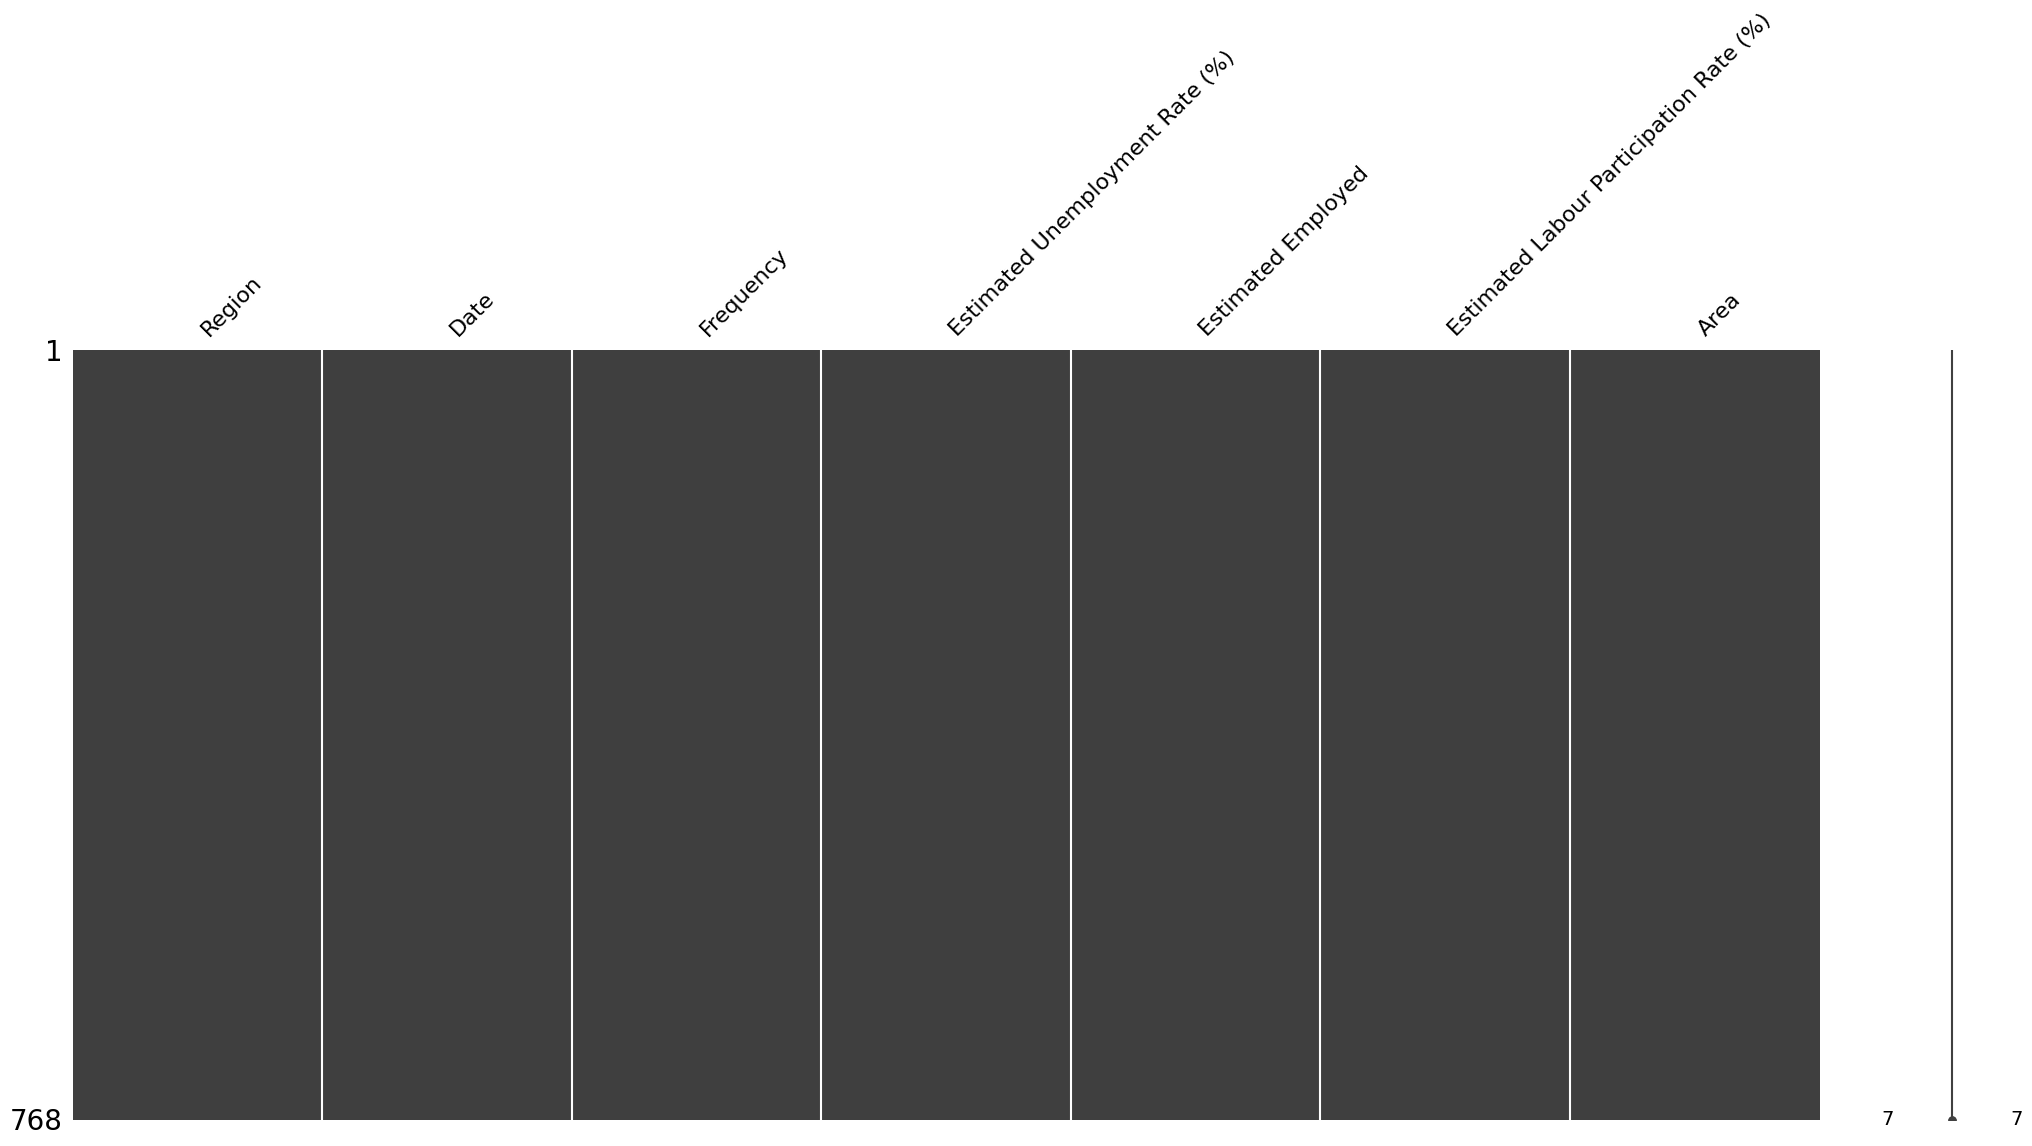

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
data=pd.read_csv(r"C:\Users\Udhaya kiran\OneDrive\Desktop\oasisinfobyte_tasks\Task-2\Unemployment in India.csv")
df=pd.DataFrame(data)
df.columns = df.columns.str.strip()
print(df.describe())
msno.matrix(df)
df.fillna(method="ffill",inplace=True)
msno.matrix(df)
print(df.head())
df.isnull().sum()

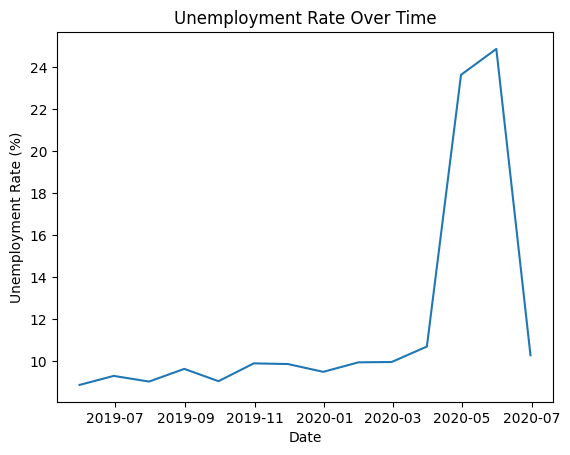

In [32]:
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df['year']=df['Date'].dt.year
monthly = df.groupby('Date').mean(numeric_only=True)
plt.figure()
plt.plot(monthly.index, monthly['Estimated Unemployment Rate (%)'])
plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()

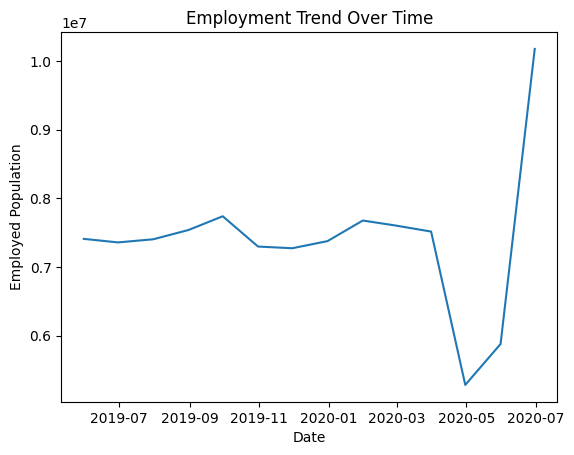

In [33]:
plt.figure()
plt.plot(monthly.index, monthly['Estimated Employed'])
plt.title("Employment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Employed Population")
plt.show()


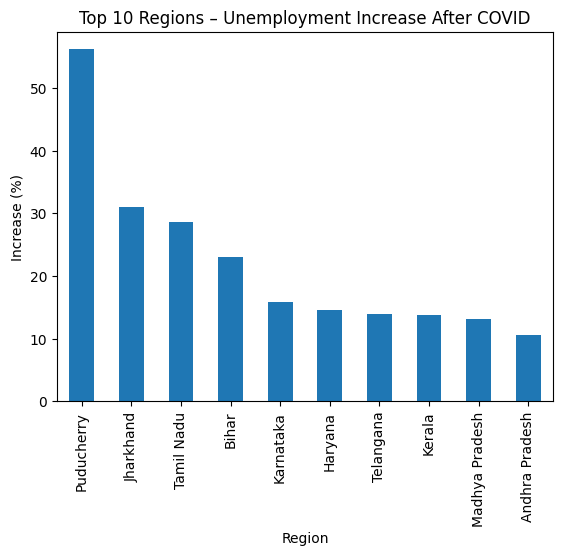

In [34]:
before = df[df['Date'] < '2020-04-01']
after = df[df['Date'] >= '2020-04-01']

before_avg = before.groupby('Region')['Estimated Unemployment Rate (%)'].mean()
after_avg = after.groupby('Region')['Estimated Unemployment Rate (%)'].mean()

impact = (after_avg - before_avg).sort_values(ascending=False).head(10)

plt.figure()
impact.plot(kind='bar')
plt.title("Top 10 Regions – Unemployment Increase After COVID")
plt.xlabel("Region")
plt.ylabel("Increase (%)")
plt.show()


Area
Rural    10.122681
Urban    13.049418
Name: Estimated Unemployment Rate (%), dtype: float64


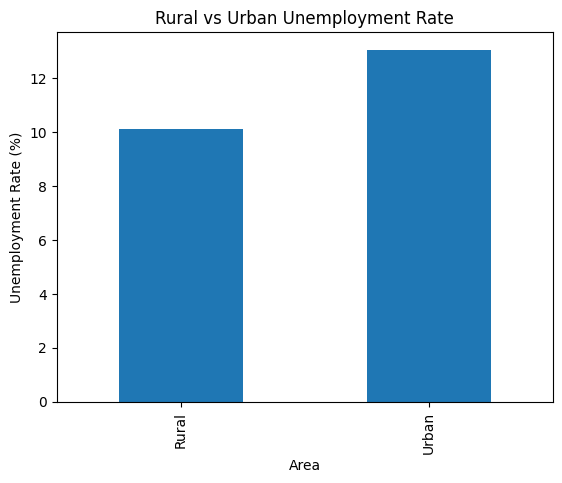

In [44]:
area_unemp = df.groupby('Area')['Estimated Unemployment Rate (%)'].mean()
print(area_unemp)
plt.figure()
area_unemp.plot(kind='bar')
plt.title("Rural vs Urban Unemployment Rate")
plt.xlabel("Area")
plt.ylabel("Unemployment Rate (%)")
plt.show()


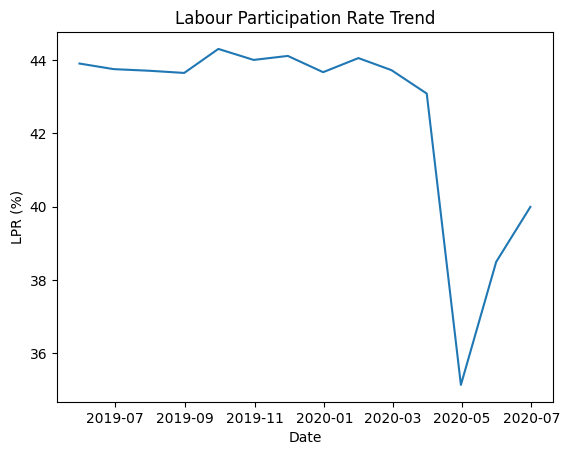

In [36]:
lpr = df.groupby('Date')['Estimated Labour Participation Rate (%)'].mean()

plt.figure()
plt.plot(lpr.index, lpr.values)
plt.title("Labour Participation Rate Trend")
plt.xlabel("Date")
plt.ylabel("LPR (%)")
plt.show()


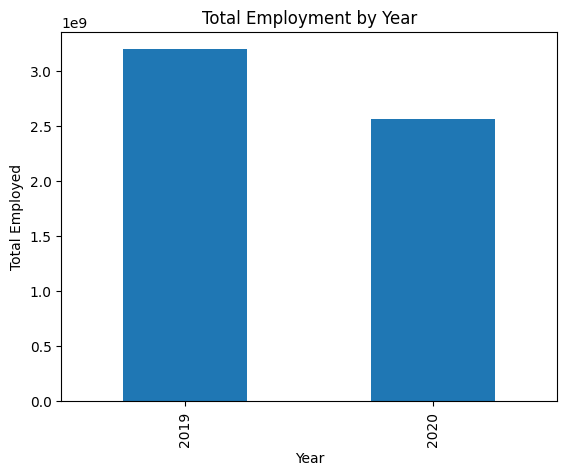

In [38]:
year_emp = df.groupby('year')['Estimated Employed'].sum()

plt.figure()
year_emp.plot(kind='bar')
plt.title("Total Employment by Year")
plt.xlabel("Year")
plt.ylabel("Total Employed")
plt.show()


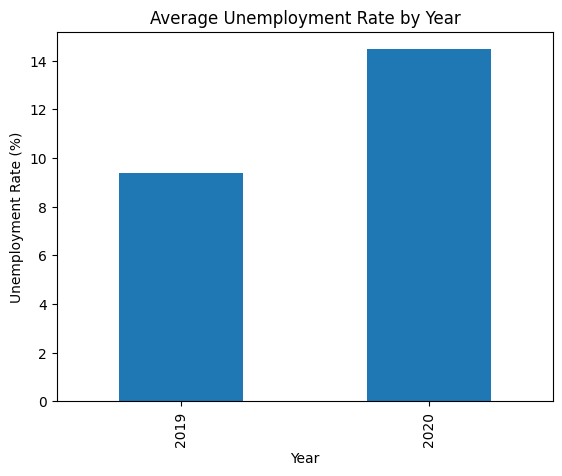

In [40]:
year_unemp = df.groupby('year')['Estimated Unemployment Rate (%)'].mean()

plt.figure()
year_unemp.plot(kind='bar')
plt.title("Average Unemployment Rate by Year")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [41]:
sunburst_df = df.groupby(['Region', 'Area'])['Estimated Employed'].sum().reset_index()

fig = px.sunburst(
    sunburst_df,
    path=['Region', 'Area'],
    values='Estimated Employed',
    title='Region and Area-wise Employment Distribution'
)

fig.show()


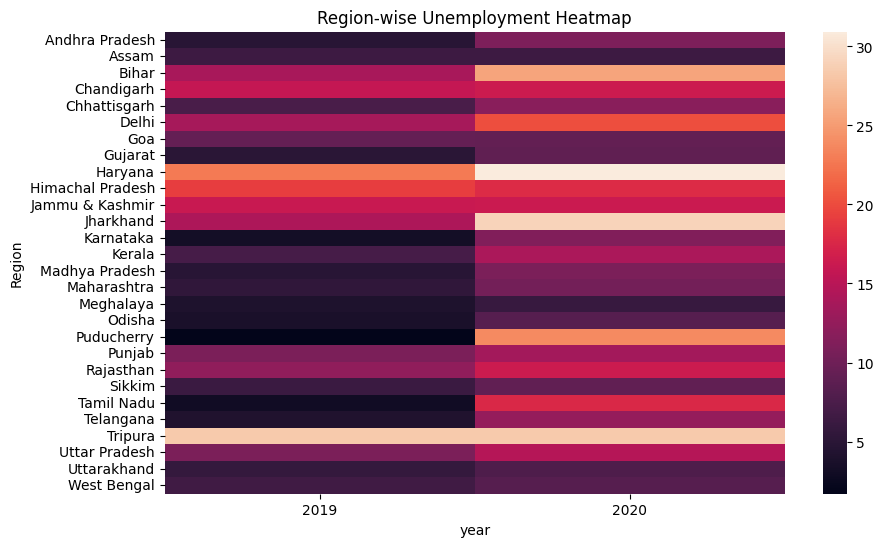

In [43]:
import seaborn as sns

pivot = df.pivot_table(
    values='Estimated Unemployment Rate (%)',
    index='Region',
    columns='year',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot)
plt.title("Region-wise Unemployment Heatmap")
plt.show()
